<a href="https://colab.research.google.com/github/Igirisu861/SmartDataProcessing/blob/main/Assignment7_PineappleTeam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="color:red;font-weight: bold;font-size:40px">Assignment 7 - NLP</span>

Imagine you are a data scientist at a major movie streaming platform. The company has access to a wealth of user-generated movie reviews collected on IMDB. These reviews not only provide a pulse on audience sentiment but also serve as a key input for improving movie recommendations and targeted marketing strategies. Your task is to derive actionable insights from this data and develop a robust predictive model to classify reviews as positive or negative.


# Retrieving the data

a) Import libraries (Pandas, Matplotlib, and Searbon)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

b) Read the IMDB Dataset CSV file and store it as a variable

In [2]:
data = pd.read_csv('/content/IMDB Dataset.csv')

c) Display the first few rows of the IMDB dataset and review its info() and describe() methods.

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


# Exploratory Data Analysis

1- Create a new column to store the length of each message. **(10 pts)**

In [9]:
data['length'] = data['review'].apply(len)
data.head()

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


2- Group the data by sentiment and apply the describe method to obtain summary statistics for each sentiment category. **(5 pts)**

In [10]:
data.groupby('sentiment').describe()

length                                                        \
             count        mean          std   min    25%    50%      75%   
sentiment                                                                  
negative   25000.0  1294.06436   945.892669  32.0  706.0  973.0  1567.25   
positive   25000.0  1324.79768  1031.492627  65.0  691.0  968.0  1614.00   

                    
               max  
sentiment           
negative    8969.0  
positive   13704.0

There are more positive reviews

3- Create a facet grid where each column represents a sentiment category, and display a histogram with the X-axis representing message length. **(10 pts)**

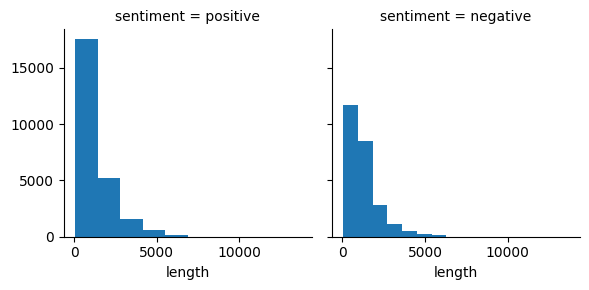

In [11]:
sns.FacetGrid(data, col='sentiment').map(plt.hist, 'length')

# Text Pre-Processing

4 - Remove both line breaks and `<p>` tags from the review. You may use the following code snippet as a guide:

`df['column'] = df['column'].str.replace(r'(<br\s*/?>|<p>|</p>)', ' ', regex=True)`

**(5 pts)**

In [13]:
data['review'] = data['review'].str.replace(r'(<br\s*/?>|<p>|</p>)', ' ', regex=True)
data['review'].head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. The filming t...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


5- Define a function named text_process that accepts a review as input and cleans it by removing punctuation and stop words. Then, apply this function to the first few rows of the IMDB dataframe. Finally, print the output of head() before and after applying the text_process function.

Do not forget to include all necessary import statements (string and stopwords)

**(20 pts)**

In [6]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Before text preprocessing

In [16]:
data['review'].head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. The filming t...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [14]:
def text_preprocess(review):
  nopunc = [char for char in review if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Apply preprocess function

In [15]:
data['review'].head().apply(text_preprocess)

,review
0,"[One, reviewers, mentioned, watching, 1, Oz, e..."
1,"[wonderful, little, production, filming, techn..."
2,"[thought, wonderful, way, spend, time, hot, su..."
3,"[Basically, theres, family, little, boy, Jake,..."
4,"[Petter, Matteis, Love, Time, Money, visually,..."


# Training the ML model

6- Applying the model to the entire dataset can be very time-consuming. To streamline the process, create a subset of 10,000 reviews (5,000 positive and 5,000 negative).

Use the provided code snippet to randomly select 5,000 positive reviews and 5,000 negative reviews. Next, group the subset by the sentiment column and apply the describe() method to verify that there are exactly 5,000 reviews for each sentiment. **(5 pts)**

In [17]:
data_subset = data.groupby('sentiment', group_keys = False).sample(n = 5000,random_state = 101)

In [19]:
data_subset.groupby('sentiment').describe()

length                                                        \
            count       mean          std   min     25%    50%      75%   
sentiment                                                                 
negative   5000.0  1281.4018   918.200249  51.0  702.00  983.0  1577.25   
positive   5000.0  1320.4726  1013.636669  98.0  690.75  968.0  1620.25   

                    
               max  
sentiment           
negative    7164.0  
positive   10321.0

7- Create your feature matrix (X) and target vector (Y) from the dataset. Then, split the data into training and testing sets, reserving 30% for testing and setting the random state to 101 to ensure reproducibility. **(10 pts)**

In [20]:
import sklearn
from sklearn.model_selection import train_test_split

In [21]:
data_subset.columns

Index(['review', 'sentiment', 'length'], dtype='object')

In [27]:
X = data_subset['review']
y = data_subset['sentiment']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Creating a Data Pipeline**

8- Create a data pipeline that includes the following components:

* CountVectorizer: Configure it to use the previously defined text_process function as its analyzer.
* MultinomialNB: Append this classifier to complete your pipeline.

Finally, fit the pipeline to your data.

Do not forget to include all necessary import statements.

**(15 pts)**

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [30]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_preprocess)),
    ('classifier', MultinomialNB())
])

In [31]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocess at 0x7f2d4c229e40>)),
                ('classifier', MultinomialNB())])

# Predictions

9 - Using your pipeline, generate predictions on the test dataset. Display or store the predicted values for further evaluation. **(5 pts)**

In [32]:
predictions = pipeline.predict(X_test)

# Evaluating the model

10- Generate and print the classification report using your predictions and the true labels.  **(5 pts)**

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.83      0.86      0.84      1504
    positive       0.85      0.82      0.84      1496

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



11 - Repeat steps 7, 8, and 9. However, this time insert TfidfTransformer() between CountVectorizer() and MultinomialNB() in your pipeline. Then, fit the pipeline, obtain predictions, and finally generate and print the classification report. Did you observe improved model performance? **(10 pts)**

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_preprocess)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [39]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocess at 0x7f2d4c229e40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [40]:
predictions2 = pipeline.predict(X_test)

In [41]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

    negative       0.83      0.89      0.86      1504
    positive       0.88      0.81      0.85      1496

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



We noticed a slight increase in the evaluation of our predictions It wasn't that great of an improvement but it was somewhat better.